# Assignment 1: Data Parsing, Cleansing and Integration
## Task 1 and 2
#### Student Name: Nguyen Duc Quang
#### Student ID: 3927198

Date: 3/9/2023

Version: 1.0

Environment: Python 3 and Jupyter notebook

Libraries used: 
- `pandas`
- `re`
- `numpy`
- `difflib`
- `xml`
- `sklearn`
- `seaborn`


## Introduction
This is the notebook describing the process of cleaning the dataset of job advertisements desmonstrating different kinds of techniques for processing errors

## Importing libraries 

In [343]:
# Importing libraries
import pandas as pd
import seaborn as sns
import re
import numpy as np
import difflib
from sklearn import linear_model
import matplotlib.pyplot as plt
from datetime import datetime
import xml.etree.ElementTree as etree  

## Task 1. Parsing Data

### 1.1. Examining and loading data

In [344]:
 tree = etree.parse('./s3927198_dataset1.xml') 

In [345]:
root = tree.getroot()

In [346]:
root.tag

'Instances'

In [347]:
root[0].tag

'Source'

Here it can be seen that the root `Instances` of the file has multiple `Source` tags, and each 'Source' tag has 1 `Name` tag inside. The information in the `Name` tag can be used in the `SourceName` column

In [348]:
for child in root[0]:
    print(child.tag)

Name
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
Record
R

In [349]:
root[0][1].tag

'Record'

In [350]:
for child in root[0][1]:
    print(child.tag)

Title
Location
Company
ContractType
ContractTime
Category
Salary
OpenDate
CloseDate


After exploring the `Record` tag, it is obvious that its children corresponds to the columns required for the data table.

### 1.2 Parsing data into the required format

In [351]:
# Initialize a dictionary to be later converted into a DataFrame
dataDict = {}
dataDict['Id'] = []
dataDict['Title'] = []
dataDict['Location'] = []
dataDict['Company'] = []
dataDict['ContractType'] = []
dataDict['ContractTime'] = []
dataDict['Category'] = []
dataDict['Salary'] = []
dataDict['OpenDate'] = []
dataDict['CloseDate'] = []
dataDict['SourceName'] = []

In [352]:
dataKeys = list(dataDict.keys())
# Assign root to another variable with different name for ease of read
sources = root
# Loop through the 'Source' tags to extract the records
for src in sources:
	src_name = src[0].text
	# Loop through the 'Record' tags in 'Source'
	for i in range(1,len(src)):
		rec = src[i]
		# Append SourceName and Id data to the dictionary
		dataDict['SourceName'].append(src_name)
		dataDict['Id'].append(src[i].attrib['ID'])
		# Pre-fill the data with placeholder in case of missing tags
		for key in dataKeys:
			if key != 'SourceName' and key != 'Id':
				dataDict[key].append('-')
		# Reassign the missing tags with records that have enough columns
		for attr in rec:
			dataDict[attr.tag][-1] = attr.text

In [353]:
# Inspect the number of rows in each columns
for key in dataDict.keys():
    print(len(dataDict[key]), " ", key)

50753   Id
50753   Title
50753   Location
50753   Company
50753   ContractType
50753   ContractTime
50753   Category
50753   Salary
50753   OpenDate
50753   CloseDate
50753   SourceName


In [354]:
# Convert the dictionary to a DataFrame and inspect it
df = pd.DataFrame(dataDict)
df

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
0,71846213,"Nurse : Medical/Surgical Roles NHS Trust, SW E...",Devon,-,-,permanent,Healthcare & Nursing Jobs,24400,20120203T150000,20120304T150000,jobs4medical.co.uk
1,68580301,Dental : Associate Dentist Jobs in Somerset,Somerset,-,-,-,Healthcare & Nursing Jobs,59000,20120926T000000,20121125T000000,jobs4medical.co.uk
2,71337916,Allied Health Care Professional : Optical Advi...,Cheshire,-,-,-,Healthcare & Nursing Jobs,14000,20121128T150000,20130127T150000,jobs4medical.co.uk
3,71353660,Dental : Associates Jobs Dentist Job in Darlin...,Durham,-,-,-,Healthcare & Nursing Jobs,28500,20130524T000000,20130607T000000,jobs4medical.co.uk
4,71337991,Allied Health Care Professional : Dispensing O...,Essex,-,-,-,Healthcare & Nursing Jobs,22000,20130711T000000,20130810T000000,jobs4medical.co.uk
...,...,...,...,...,...,...,...,...,...,...,...
50748,72702599,Scientific Editorial Team Leader,London,Executive Facilities,full_time,permanent,Healthcare & Nursing Jobs,50000,20130626T150000,20130924T150000,jobsinsocialwork.co.uk
50749,59865461,Adult Care Learning Advisor,Devon,Forces Recruitment Services Ltd,full_time,permanent,Teaching Jobs,19387,20130314T120000,20130513T120000,jobsinsocialwork.co.uk
50750,65120529,"Key Client Consultant (Account Manager, Area S...",Surrey,Blue Octopus Recruitment Ltd,full_time,permanent,Healthcare & Nursing Jobs,15000,20120408T000000,20120508T000000,jobsinsocialwork.co.uk
50751,69689514,medical help desk,Northamptonshire,Support Services Group,full_time,permanent,Healthcare & Nursing Jobs,24000,20130102T150000,20130201T150000,jobsinsocialwork.co.uk


## Task 2. Auditing and cleansing the loaded data

Here, you should write your own code to audit data, identify data problems and to fix them. You are also required to record the errors found and fixings in an error list.

### 2.1. Define error file DataFrame and error adding function

In [355]:
# Initializing error file name destination and DataFrame object for recording errors
error_file = './s3927198_errorlist.csv'
errDict = dict()
errDict['indexOfdf'] = []
errDict['Id'] = []
errDict['ColumnName'] = []
errDict['Original'] = []
errDict['Modified'] = []
errDict['ErrorType'] = []
errDict['Fixing'] = []

In [356]:
def add_err(ind, ids, col, ori, mod, errtype, fixing=None ):
    # Appending to errDict for each column of the error table
    errDict['indexOfdf'].append(ind)
    errDict['Id'].append(ids)
    errDict['ColumnName'].append(col)
    errDict['Original'].append(ori)
    errDict['Modified'].append(mod)
    errDict['ErrorType'].append(errtype)
    if fixing == None:
        # Fixing format if no fixing value is specified for the function
        errDict['Fixing'].append(f"Change '{str(ori)}' to '{str(mod)}'")
    else:
        errDict['Fixing'].append(fixing)

### 2.2. Audit data

#### Audit String type columns

In [357]:
df['ContractType'].value_counts()

-            27790
full_time    11249
N/A           7611
              2682
part_time     1421
Name: ContractType, dtype: int64

In [358]:
df['ContractTime'].value_counts()

permanent    31023
-             5812
contract      5629
              4404
N/A           3885
Name: ContractTime, dtype: int64

In [359]:
df['Category'].value_counts()

IT Jobs                             13119
Healthcare & Nursing Jobs            8070
Engineering Jobs                     7522
Accounting & Finance Jobs            6779
Sales Jobs                           4880
Hospitality & Catering Jobs          4400
Teaching Jobs                        3471
PR, Advertising & Marketing Jobs     2512
Name: Category, dtype: int64

In [360]:
df['SourceName'].value_counts()

totaljobs.com        9265
cv-library.co.uk     7169
jobsite.co.uk        3331
cwjobs.co.uk         2838
staffnurse.com       2527
                     ... 
grb.uk.com              4
scotsman.com            4
jobs.gponline.com       3
cvjobstore.com          1
thegraduate.co.uk       1
Name: SourceName, Length: 107, dtype: int64

In [361]:
df['Company'].value_counts()

-                     2637
                      1925
UKStaffsearch          451
Randstad               374
N/A                    373
                      ... 
Victor Michael Ltd       1
Xoserve                  1
Don't Move Extend        1
Paragon Network          1
Group Cytek              1
Name: Company, Length: 8767, dtype: int64

In [362]:
df['Location'].value_counts()

UK                   7719
London               6571
South East London    2665
The City             1144
Central London        829
                     ... 
HAMpshire               1
BRISTOL                 1
Oxfords                 1
Livepool                1
ABERDEEN                1
Name: Location, Length: 496, dtype: int64

After auditing columns of type string, we can see that there are several errors:
- Inconsistency representation of null values ('-', 'N/A',' ')
- Misspellings ('HAMpshire', 'Livepool',...)

#### Audit datetime columns

In [363]:
df['OpenDate'].value_counts()

20130626T150000    41
20130813T150000    40
20120408T120000    39
20120519T120000    39
20120209T150000    39
                   ..
20120126T120000    10
20121026T000000    10
20120525T120000    10
20122201T120000     1
20140223T150000     1
Name: OpenDate, Length: 2195, dtype: int64

In [364]:
df['CloseDate'].value_counts()

20120508T000000    39
20130502T000000    38
20130317T150000    37
20120908T150000    37
20130825T000000    37
                   ..
20120120T000000     1
20120118T120000     1
20120126T000000     1
20120120T120000     1
20120128T150000     1
Name: CloseDate, Length: 2414, dtype: int64

After auditing datetime columns, it can clearly be seen that the dates are in the wrong format.

#### Audit numeric columns

In [365]:
df['Salary'].value_counts()

35000              1736
30000              1666
40000              1565
-                  1448
32500              1361
                   ... 
20700                 1
22000/year            1
15500  ~  20500       1
15745                 1
53520                 1
Name: Salary, Length: 3444, dtype: int64

In [366]:
non_digit_chars = df['Salary'].apply(lambda x: re.findall(r'\D+', str(x)))
non_digit_chars.astype('str').value_counts()

[]                    47811
['-']                  1448
['N/A']                 399
[' ']                   342
['.']                   293
[' per Annum']          100
[' to ']                100
['/year']               100
['k']                    50
[' - ']                  30
[' ~ ']                  30
['  ~  ']                30
['.', ' per hour']       10
['.', ' p/h']            10
Name: Salary, dtype: int64

After auditing the Salary column, it can be seen that the salaries are represented in different formats, which needs to be unified.

### 2.3. Cleanse the data and further processing.

#### Fix the inconsistent representation of null values in string columns

In [367]:
# Define variations of null values in the dataset
nan_vals = ['N/A', '', '-']

# Loop through the string data columns to replace wrong null values with 'non-specified'
for col in df.columns:
    # Skip non-string columns
    if col == 'Salary' or col == 'CloseDate' or col == 'OpenDate':
        continue
    # Loop through values of each column
    for i in range(len(df[col])):
        # Skip if value is not a wrong representation of null values
        if df[col].iloc[i].strip() not in nan_vals:
            continue
        # Fix the value and add the error to error List
        err_mod =  'non-specified'
        add_err(i, df['Id'].iloc[i], col, df[col].iloc[i], err_mod, 'Inconsistency representation of null value' )
        df[col].iloc[i] = err_mod

#### Fix OpenDate and CloseDate columns

##### Reformat datetime values

In [368]:
# Define datetime regex to fix the format
dt_regex = r'(\d{4})(\d{2})(\d{2})T(\d{2})(\d{2})(\d{2})'

In [369]:
# Define function to rearrange groups in the original datetime string
def transform_datetime(raw):
    result = re.fullmatch(dt_regex, raw)
    return f'{result.group(1)}-{result.group(2)}-{result.group(3)} {result.group(4)}:{result.group(5)}:{result.group(6)}'

In [370]:
# Reformat both datetime columns and add error
add_err('ALL', 'ALL', 'OpenDate, CloseDate', 'ALL', 'ALL', 'Irregularities of datetime format', 'Reformat based on regular expressions')
df['OpenDate'] = df['OpenDate'].apply(transform_datetime)
df['CloseDate'] = df['CloseDate'].apply(transform_datetime)

##### Find and fix invalid datetime values in both columns

In [371]:
# Define the format of the input string
format_string = "%Y-%m-%d %H:%M:%S"

# Convert the string to a datetime object to check for invalid datetimes
open_error = []
for i in range(len (df['OpenDate'])):
    try:
        datetime_object = datetime.strptime(df['OpenDate'].iloc[i], format_string)
    # Capture invalid dates in open_error
    except:
        open_error.append([i, df['OpenDate'].iloc[i]])

In [372]:
open_error

[[29273, '2012-22-01 12:00:00']]

In [373]:
close_error = []
for val in df['CloseDate']:
    try:
        datetime_object = datetime.strptime(val, format_string)
    # Capture invalid dates in close_error
    except:
        close_error.append(val)

In [374]:
close_error

[]

In [375]:
# CloseDate of the OpenDate error
df['CloseDate'].iloc[open_error[0][0]]

'2012-04-21 12:00:00'

Since the OpenDate is 2012-22-01 and CloseDate is 2012-04-21, the OpenDate is likely 2012-02-01, since the month of the OpenDate should be less than or equal to the CloseDate

In [376]:
# Define to be modified value
open_mod = '2012-02-01 12:00:00'
# Index of OpenDate error
ind = open_error[0][0]
# Add OpenDate error to error list
add_err(ind, df['Id'].iloc[ind], 'OpenDate', open_error[0][1], open_mod, "Integrity Constraint Violation", "Change OpenDate month to before CloseDate")
# Fix OpenDate error in dataframe
df['OpenDate'].iloc[open_error[0][0]] = open_mod


##### Find logical errors in datetime columns

In [377]:
# Transform CloseDate and OpenDate into 2 arrays of datetime objects
open = []
for i in range(len (df['OpenDate'])):
    datetime_object = datetime.strptime(df['OpenDate'].iloc[i], format_string)
    open.append(datetime_object)

close = []
for i in range(len (df['CloseDate'])):
    datetime_object = datetime.strptime(df['CloseDate'].iloc[i], format_string)
    close.append(datetime_object)

In [378]:
# Record logical errors indexes
close_open_error_ind = []
for i in range(len(open)):
    if open[i] > close[i]:
        close_open_error_ind.append(i)

In [379]:
close_open_error_ind

[11245, 19021, 24987, 44664, 49451]

In [380]:
# Inspect logical errors
df[['OpenDate', 'CloseDate']].iloc[close_open_error_ind]

,OpenDate,CloseDate
11245,2012-11-02 15:00:00,2012-10-03 15:00:00
19021,2013-09-18 12:00:00,2013-06-20 12:00:00
24987,2012-04-30 12:00:00,2012-03-31 12:00:00
44664,2014-02-23 15:00:00,2013-12-25 15:00:00
49451,2012-05-06 00:00:00,2012-04-06 00:00:00


In [381]:
# Fix logical errors and add to error list
for i in close_open_error_ind:
    openDate = df['OpenDate'].iloc[i]
    closeDate = df['CloseDate'].iloc[i]
    add_err(i, df['Id'].iloc[i], 'OpenDate, CloseDate', openDate, closeDate, "Integrity Constraint Violation", "Swap OpenDate and CloseDate values")
    add_err(i, df['Id'].iloc[i], 'OpenDate, CloseDate', closeDate, openDate, "Integrity Constraint Violation", "Swap OpenDate and CloseDate values")
    # Swap CloseDate and OpenDate
    df['OpenDate'].iloc[i] = closeDate
    df['CloseDate'].iloc[i] = openDate

#### Fix Location column

Since the frequencies of misspelled values are all under 7, we will use 6 as a threshold to identify misspellings

In [382]:
v  = df['Location'].value_counts()
threshold = 6
# Identify misspellings
locations = df.loc[~df['Location'].isin(v.index[v.gt(threshold)]), 'Location']
for val in locations:
        print(val)

HAMpshire
Hampshira
BRISTOL
DONCASTER
Livepool
Leads
LANCASHIRE
Oxfords
Leads
Cembridge
SURREY
Warringtn
Hampshira
DONCASTER
Warringtn
london
LANCASHIRE
london
birmingham
Croydan
Londn
Manchaster
SURREY
ABERDEEN


In [383]:
# Define dictionary for replacement
replace_dict = dict()
for ind, word in locations.items():
    # Normalise case for word letters
    case_word = word[0].upper() + word[1:].lower()
    # find correct word to replace
    new_word = difflib.get_close_matches(case_word, set(df['Location']).difference(locations), n=1, cutoff=0.8)[0]
    # Add to error list and add correct word to dictionary
    add_err(ind, df['Id'].iloc[ind], 'Location', word, new_word, "Misspelling")
    replace_dict[word] = new_word

In [384]:
# Replace misspellings with correct words
df['Location'].replace(replace_dict, inplace=True)

In [385]:
df['Location'].value_counts()

UK                   7719
London               6574
South East London    2665
The City             1144
Central London        829
                     ... 
Twickenham              9
Lutterworth             9
Normanton               9
Waterlooville           8
North Finchley          7
Name: Location, Length: 479, dtype: int64

#### Fix Salary column

##### Reformat Salary column

In [386]:
# Define null values representations in Salary column
salary_nans = ['N/A', '-', '0', ' ']

The reformat_salary function is written based on the patterns capture in the audit stage above

In [387]:
def reformat_salary(old):
    # If value is null, return null
    if old in salary_nans:
        return None
    old = str(old)
    # If value is correct format
    if re.fullmatch('(\d+)\.(\d+)', old) or re.fullmatch('(\d+)', old):
        return float(old)
    # If value is a number
    if re.fullmatch('(\d+) per Annum', old):
        return float(re.fullmatch('(\d+) per Annum', old).group(1))
    if re.fullmatch('(\d+)/year', old):
        return float( re.fullmatch('(\d+)/year', old).group(1))
    # If value is a number with 'k'
    if re.fullmatch('(\d+)k', old):
        return float(re.fullmatch('(\d+)k', old).group(1)) * 1000
    # If value represents a range between 2 number
    if re.fullmatch('(\d+).+(\d+)', old):
        return (float(re.fullmatch('(\d+).+ (\d+)', old).group(1)) + float(re.fullmatch('(\d+).+ (\d+)', old).group(2))) / 2    
    # If value is the hourly wage
    if re.fullmatch('(\d+\.\d+) per hour', old):
        return float(re.fullmatch('(\d+\.\d+) per hour', old).group(1)) * 8 * 365 
    if re.fullmatch('(\d+\.\d+) p/h', old):
        return float( re.fullmatch('(\d+\.\d+) p/h', old).group(1)) * 8 * 365  
    return None

In [388]:
# Loop through Salary column to fix and add error
for i in range(len(df['Salary'])):
    old = df['Salary'].iloc[i]
    if reformat_salary(old) != None:
        new_val = reformat_salary(old)
        add_err(i, df['Id'].iloc[i], 'Salary', old, new_val, 'Irregularities of salary format')
        df['Salary'].iloc[i] = new_val


##### Find and fix outliers in Salary column

In [389]:
# Define dataframe version with to null values of Salary
df_no_nan = df.loc[~df['Salary'].isin(salary_nans)]

<Axes: xlabel='Salary'>

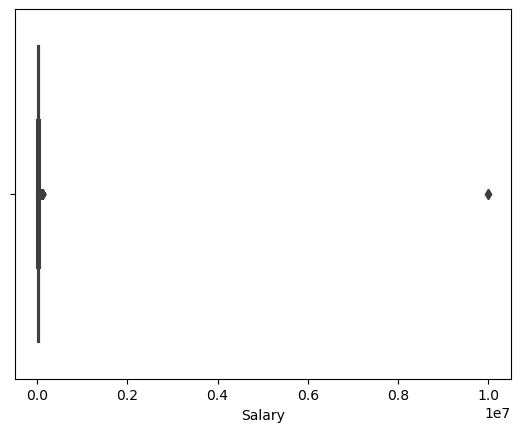

In [390]:
# Boxplot Salary column
sns.boxplot(data=df_no_nan, x='Salary')

In [391]:
df_no_nan['Salary'].max()

10000000.0

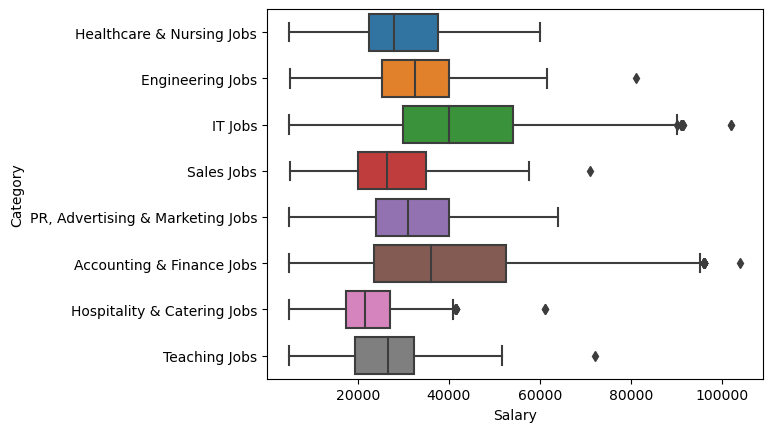

In [392]:
# Boxplot Salary column without abnormal max value
sns.boxplot(data=df_no_nan,x=df_no_nan['Salary'].loc[df_no_nan['Salary'] < 10000000.0], y = df_no_nan['Category'])
plt.show()

In [393]:
# Add outliers indexes into an array
outliers_ind = []
outliers_ind.extend(df_no_nan.loc[(df_no_nan['Category'] == 'Engineering Jobs' )& (df_no_nan['Salary'] > 80000)].index.tolist())
outliers_ind.extend(df_no_nan.loc[(df_no_nan['Category'] == 'IT Jobs' )& (df_no_nan['Salary'] > 100000)].index.tolist())
outliers_ind.extend(df_no_nan.loc[(df['Category'] == 'Accounting & Finance Jobs' )& (df_no_nan['Salary'] > 100000)].index.tolist())
outliers_ind.extend(df_no_nan.loc[(df_no_nan['Category'] == 'Sales Jobs' )& (df_no_nan['Salary'] > 60000)].index.tolist())
outliers_ind.extend(df_no_nan.loc[(df_no_nan['Category'] == 'Hospitality & Catering Jobs' )& (df_no_nan['Salary'] > 60000)].index.tolist())
outliers_ind.extend(df_no_nan.loc[(df_no_nan['Category'] == 'Teaching Jobs' )& (df_no_nan['Salary'] > 60000)].index.tolist())
outliers_ind.extend(df_no_nan.loc[df_no_nan['Salary'] == df_no_nan['Salary'].max()].index.tolist())

outliers_ind

[47107, 6068, 41838, 50077, 46117, 19329, 20181, 34390, 1647, 2372]

In [394]:
# Add outliers error and drop outliers
for ind in outliers_ind:
    add_err(ind, df['Id'].iloc[ind], 'Salary', df['Salary'].iloc[ind], '', 'Outlier', 'Extreme outliers need to be dropped')
df = df.drop(outliers_ind)

In [395]:
# Reset index after dropping values 
df.reset_index(inplace=True)

In [396]:
df.drop(columns=['index'], inplace=True)

##### Predict missing values in Salary column

In [397]:
# Define columns that are Salary dependent on
cols = ['ContractType', 'ContractTime', 'Category','Location']
# Create dummy dataframe for machine learning
dummy = pd.get_dummies(df, columns=cols)
dummy.columns

Index(['Id', 'Title', 'Company', 'Salary', 'OpenDate', 'CloseDate',
       'SourceName', 'ContractType_full_time', 'ContractType_non-specified',
       'ContractType_part_time',
       ...
       'Location_Woodthorpe', 'Location_Worcester', 'Location_Worcestershire',
       'Location_Workington', 'Location_Worksop', 'Location_Worthing',
       'Location_Wrexham', 'Location_Yeovil', 'Location_York',
       'Location_Yorkshire and Humberside'],
      dtype='object', length=500)

In [398]:
# Define dummy dataframe with to null values of Salary
dummy_no_nan = dummy.loc[~dummy['Salary'].isin(salary_nans)]

In [399]:
# Define training sets
dummy_cols = dummy.columns[7::]
x_train = dummy_no_nan[dummy_cols]
y_train = dummy_no_nan['Salary']

In [400]:
# Fit model
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [401]:
# define dummy dataframe with missing values
dummy_missing = dummy.loc[dummy['Salary'].isin(salary_nans)]
dummy_nan = dummy.iloc[dummy_missing.index]
dummy_nan

,Id,Title,Company,Salary,OpenDate,CloseDate,SourceName,ContractType_full_time,ContractType_non-specified,ContractType_part_time,...,Location_Woodthorpe,Location_Worcester,Location_Worcestershire,Location_Workington,Location_Worksop,Location_Worthing,Location_Wrexham,Location_Yeovil,Location_York,Location_Yorkshire and Humberside
49,66579338,Dental : Dental Nurse GDN****,non-specified,-,2013-12-30 15:00:00,2014-02-28 15:00:00,jobs4medical.co.uk,0,1,0,...,0,0,0,0,0,0,0,0,0,0
60,70229120,Allied Health Care Professional : Optometrist ...,non-specified,-,2012-10-29 12:00:00,2012-11-28 12:00:00,jobs4medical.co.uk,0,1,0,...,0,0,0,0,0,0,0,0,0,0
146,67155590,Allied Health Care Professional : Operations M...,non-specified,-,2013-06-27 00:00:00,2013-08-26 00:00:00,jobs4medical.co.uk,0,1,0,...,0,0,0,0,0,0,0,0,0,0
151,71337829,Allied Health Care Professional : Newly Qualif...,non-specified,-,2012-10-12 12:00:00,2012-10-26 12:00:00,jobs4medical.co.uk,0,1,0,...,0,0,0,0,0,0,0,0,0,0
170,69973880,Allied Health Care Professional : Mobile Optom...,non-specified,-,2013-03-11 15:00:00,2013-04-10 15:00:00,jobs4medical.co.uk,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50639,71745097,Subject Leader for Science,Woodlands Community College,-,2012-01-30 12:00:00,2012-03-30 12:00:00,Teaching jobs - TES Connect,0,1,0,...,0,0,0,0,0,0,0,0,0,0
50672,72393611,Senior Structural AutoCAD Technician,Walker Dendle,,2012-06-21 15:00:00,2012-08-20 15:00:00,ncejobs.co.uk,0,1,0,...,0,0,0,0,0,0,0,0,0,0
50709,71966372,Business Development Manager – Travel Payments,CorporatePay,-,2012-10-13 15:00:00,2012-12-12 15:00:00,cardandpaymentjobs.com,0,1,0,...,0,0,0,0,0,0,0,0,0,0
50731,71088787,Copy Writer / Communications Executive,Prysm Media Group Ltd,N/A,2012-03-11 00:00:00,2012-05-10 00:00:00,workthing.com,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [402]:
# Predict Salary values
prediction = regr.predict(dummy_nan[dummy_cols])

In [403]:
prediction

array([29655.5 , 32423.25, 36861.5 , ..., 49269.5 , 24955.5 , 37290.5 ])

In [404]:
# Fix Salary values and add error
c = 0
for i in range(len(df['Salary'])):
    if df['Salary'].iloc[i] in salary_nans:
        add_err(i, df['Id'].iloc[i], 'Salary', df['Salary'].iloc[i], prediction[c],"Missing values", "Fill values based on model prediction" )
        df['Salary'].iloc[i] = prediction[c]
        c += 1

----------------

## Saving data
Save the parsed and cleaned data as well as the error list, named as:
- \<student\_id\>_dataset1_solution.csv
- \<student\_id\>_errorlist.csv

In [405]:
# code to save output data
df.to_csv("./s3927198_dataset1_solution.csv")
err_df = pd.DataFrame(errDict)
err_df.to_csv("./s3927198_errorlist.csv")


## Summary
In short, the assignment is very interesting with different kinds of data cleaning errors and what to look out for when preparing datasets.